<a href="https://colab.research.google.com/github/uavinash15/DataScience-/blob/main/Notebooks/Clustering/DBSCAN_Clustering_on_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv("iris (1).csv");
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [61]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
df1=df.drop(['Species'],axis=1)

In [64]:
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
array=df1.values

In [66]:
array


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [67]:
stdscaler=StandardScaler().fit(array)
X=stdscaler.transform(array)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [68]:
dbscan=DBSCAN(eps=0.495,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.495)

In [69]:
dbscan.labels_
#this gives clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [70]:
# we got three clusters as 0,-1,1 and

In [71]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [72]:
pd.set_option("display.max_rows",None)
c1

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [73]:
df1=pd.concat([df,c1],axis=1)
df1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


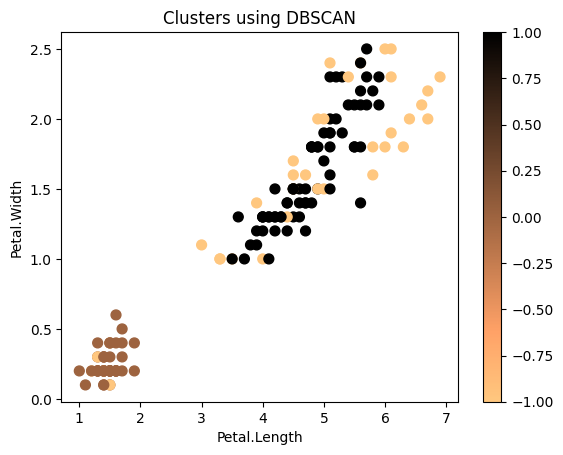

In [74]:
df1.plot(x="Petal.Length",y="Petal.Width",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title('Clusters using DBSCAN')
plt.show()

In [75]:
d1=dbscan.labels_

In [76]:
import sklearn
sklearn.metrics.silhouette_score(X,d1)

np.float64(0.341927651979435)

In [77]:
#weak cluster formation

In [78]:
from sklearn.cluster import KMeans
clf=KMeans(n_clusters=3)
y_kmeans=clf.fit_predict(X)


In [79]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [80]:
cl1=pd.DataFrame(y_kmeans,columns=['KCluster'])
cl1

,KCluster
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [81]:
df2=pd.concat([df1,cl1],axis=1)
df2


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster,KCluster
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1
5,5.4,3.9,1.7,0.4,setosa,0,1
6,4.6,3.4,1.4,0.3,setosa,0,1
7,5.0,3.4,1.5,0.2,setosa,0,1
8,4.4,2.9,1.4,0.2,setosa,0,1
9,4.9,3.1,1.5,0.1,setosa,0,1


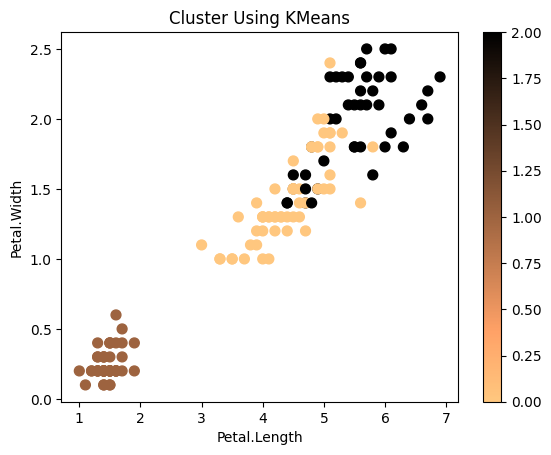

In [82]:
df2.plot(x='Petal.Length',y='Petal.Width',c=y_kmeans,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title('Cluster Using KMeans')
plt.show()

In [83]:
sklearn.metrics.silhouette_score(X,y_kmeans)

np.float64(0.4630420362927048)

In [84]:
#somewhat improved silhoutte score near to 0.5 which is good model

In [85]:
from sklearn.neighbors import NearestNeighbors

In [86]:
neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

In [87]:
print(neigh)

NearestNeighbors(n_neighbors=8)


In [88]:
print(nbrs)

NearestNeighbors(n_neighbors=8)


In [89]:
print(distances)

[[0.         0.13163218 0.13383627 ... 0.26013882 0.26013882 0.2662756 ]
 [0.         0.16614339 0.17890971 ... 0.27119749 0.28389113 0.43399991]
 [0.         0.13383627 0.17051228 ... 0.35304268 0.36350361 0.36792033]
 ...
 [0.         0.31365995 0.40749818 ... 0.46332483 0.46388867 0.4770659 ]
 [0.         0.21196853 0.50326741 ... 0.72001003 0.72740278 0.90623619]
 [0.         0.20917957 0.26767253 ... 0.60717322 0.61087766 0.63590559]]


In [90]:
print(indices)

[[  0  17  27 ...   4  28   7]
 [  1  25  12 ...   9  30   3]
 [  2  47  29 ...  34  42  35]
 ...
 [147 116 137 ... 145 110  77]
 [148 136 100 ... 144 110 143]
 [149 138 127 ... 103 126  66]]


In [94]:
distances=np.sort(distances,axis=0)
distances = distances[:,1]
distances

array([0.        , 0.        , 0.12116787, 0.12116787, 0.12116787,
       0.12116787, 0.13163218, 0.13163218, 0.13163218, 0.13163218,
       0.13163218, 0.13163218, 0.13383627, 0.13383627, 0.13383627,
       0.13383627, 0.13383627, 0.13383627, 0.13383627, 0.13383627,
       0.14337896, 0.14337896, 0.14337896, 0.14337896, 0.16614339,
       0.16614339, 0.16614339, 0.16614339, 0.16614339, 0.17051228,
       0.17051228, 0.17890971, 0.17890971, 0.17890971, 0.17890971,
       0.18772101, 0.18772101, 0.20917957, 0.21196853, 0.21196853,
       0.21196853, 0.21196853, 0.21196853, 0.21196853, 0.21541   ,
       0.21541   , 0.22734971, 0.22734971, 0.22734971, 0.22734971,
       0.23710977, 0.23710977, 0.23710977, 0.23710977, 0.23710977,
       0.23710977, 0.23710977, 0.24233574, 0.24233574, 0.24233574,
       0.24233574, 0.24891184, 0.25673434, 0.26013882, 0.26013882,
       0.26013882, 0.26013882, 0.26013882, 0.26270691, 0.26517463,
       0.2662756 , 0.2662756 , 0.2662756 , 0.2662756 , 0.26627

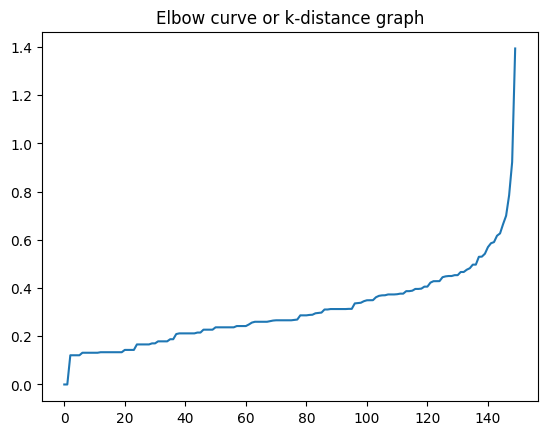

In [97]:
plt.plot(distances)
plt.title('Elbow curve or k-distance graph')
plt.show()